<a href="https://colab.research.google.com/github/phoumithona/matrix_computation/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt
# initial variables
xtrain = []
ytrain = []
ztrain = []
htrain = []
xtest = []
ytest = []
ztest = []
htest = []

with open('data_train.csv', newline='') as myfile: # open data_train as 'myfile'
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
    #     print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        xtrain.append(i[0])  
        ytrain.append(i[1])
        ztrain.append(i[2])  
        htrain.append(i[3])
        ct += 1
# coverting string to float
x_train = np.array([float(i) for i in xtrain])
y_train = np.array([float(i) for i in ytrain])
z_train = np.array([float(i) for i in ztrain])
h_train = np.array([float(i) for i in htrain])

with open('data_test.csv', newline='') as myfile: # open data_test as 'myfile'
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
    #     print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        xtest.append(i[0]) 
        ytest.append(i[1])
        ztest.append(i[2])
        htest.append(i[3])
        ct += 1
x_test = np.array([float(i) for i in xtest])
y_test = np.array([float(i) for i in ytest])
z_test = np.array([float(i) for i in ztest])
h_test = np.array([float(i) for i in htest])

###1. Plot the estimated parameters using the training dataset $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$

Theta_0 =  1.5203577423534216
Theta_1 =  0.6819818426257609
Theta_2 =  1.4260602338374437
Theta_3 =  0.8408333013910286


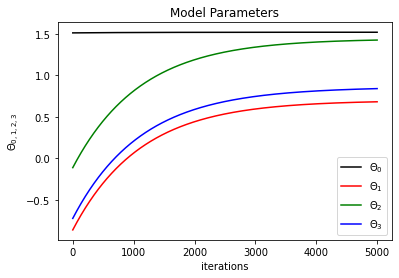

In [2]:
# initial value for theta_0,1,2,3
theta_0 = np.random.normal(0,1)
theta_1 = np.random.normal(0,1)
theta_2 = np.random.normal(0,1)
theta_3 = np.random.normal(0,1)

alpha = 0.00000001   # learning rate
iterations = 5000    # number of iterations
m = len(xtrain)      # number of features

j1= []
j2 = []
theta0 = []
theta1 = []
theta2 = []
theta3 = []
# loop for updating with iterations
for i in range (iterations):
    f = theta_0 + theta_1 * x_train + theta_2 * y_train + theta_3 * z_train
    temp_j1 = (1/(2*m))*(sum(theta_0 + theta_1*x_train + theta_2*y_train + theta_3*z_train - h_train)**2)
    j1.append(temp_j1)
    temp_j2 = (1/(2*m))*(sum(theta_0 + theta_1*x_test + theta_2*y_test + theta_3*z_test - h_test)**2)
    j2.append(temp_j2)
               
    theta_0 = theta_0 - (alpha/m)*(sum(f - h_train))
    theta0.append(theta_0)
    theta_1 = theta_1 - (alpha/m)*(sum((f - h_train)*x_train))
    theta1.append(theta_1)
    theta_2 = theta_2 - (alpha/m)*(sum((f - h_train)*y_train))
    theta2.append(theta_2)
    theta_3 = theta_3 - (alpha/m)*(sum((f - h_train)*z_train))
    theta3.append(theta_3)
# printing the final theta values             
print('Theta_0 = ',theta_0)
print('Theta_1 = ',theta_1)
print('Theta_2 = ',theta_2)
print('Theta_3 = ',theta_3)

plt.plot(theta0,'k')
plt.plot(theta1,'r')
plt.plot(theta2,'g')
plt.plot(theta3,'b')
plt.xlabel('iterations')
plt.ylabel('$\Theta_{0,1,2,3}$')
plt.legend(['$ \Theta_0 $','$ \Theta_1 $','$ \Theta_2 $','$ \Theta_3 $'])
plt.title('Model Parameters')
plt.show()

###2. Plot the training error using the training dataset $J(\theta_0, \theta_1, \theta_2, \theta_3)$

Training Error =  8022.4159686387275


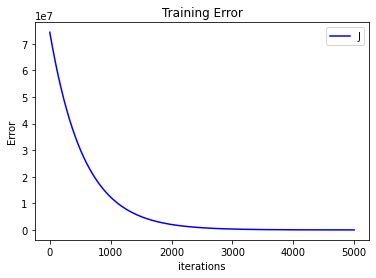

In [3]:
plt.plot(j1,'b')
print('Training Error = ', j1[len(j1)-1])
plt.xlabel('iterations')
plt.ylabel('Error')
plt.legend(('J'))
plt.title('Training Error')
plt.show() # plot error for training data

###3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence $J(\theta_0, \theta_1, \theta_2, \theta_3)$

Testing Error =  1934.495161277629


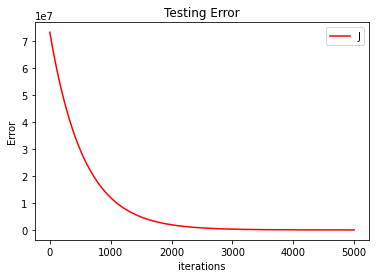

In [4]:
plt.plot(j2,'r')
print('Testing Error = ',j2[len(j2)-1])
plt.xlabel('iterations')
plt.ylabel('Error')
plt.legend('J') 
plt.title('Testing Error')
plt.show() # plot error for testing data